In [3]:
from utils import ori_dataset_path, gen_dataset_path, _read_dataset


AssertionError: Expected exactly one file to match search pattern for generated D2. Found: []

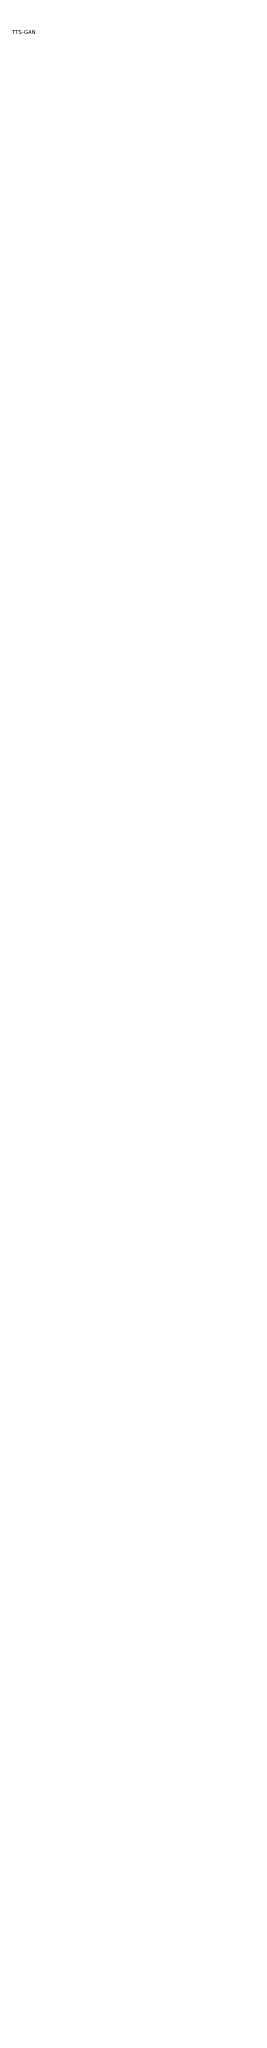

In [4]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from datetime import datetime
import random

def _plot_timeseries(timeseries, ax=None, channel_nos=None, labels=None, autoscale=False):
    channels = timeseries.T
    if channel_nos == None:
        channel_nos = range(len(channels))
    if labels == None:
        labels = channel_nos
    for i, channel_no in enumerate(channel_nos):
        channel = channels[channel_no]
        ax.plot(range(len(timeseries)), channel, label=labels[i], linewidth=0.4)
        if not autoscale:
            ax.set_ylim([-0.1, 1.1])

def plot_all(indexes=None, labels=None):
    methods = ['TTS-GAN', 'TimeGAN', 'Time-Transformer AAE', 'TimeVQVAE', 'TransFusion']
    column_titles = methods + ['Ori']
    dataset_nos = range(2,8)

    n_rows = len(dataset_nos) * 4
    n_cols = len(column_titles)
    fig, axs = plt.subplots(
        n_rows,
        n_cols,
        figsize=(n_cols, n_rows*2),  # width * height scale
    )


    #fig, axs = plt.subplots(len(dataset_nos)*4, len(column_titles), gridspec_kw={'wspace': 0.2})
    for row in axs:
        for ax in row:
            ax.axis('off')


    for dataset_idx, dataset_no in enumerate(dataset_nos):
            for column, method in enumerate(column_titles):
                if dataset_idx == 0:
                    axs[0, column].set_title(column_titles[column], size='x-small')

                for i in range(0,3):
                    row = (4 * dataset_idx) + i
                    ax = axs[row, column]
                    ax.set_box_aspect(0.2)
                    if column == 0 and row % 4 == 1:
                        ax.annotate(f"D{dataset_no}", xy=(-0.5, 0.5), xycoords='axes fraction', rotation=0, size='x-small', va='center')


                    if method == 'Ori':
                        dataset, file_name = _read_dataset(ori_dataset_path(dataset_no))
                    else:
                        dataset, file_name = _read_dataset(gen_dataset_path(method, dataset_no))
                    rand_idx = random.randint(0, dataset.shape[0])
                    _plot_timeseries(dataset[rand_idx], ax, indexes, labels, autoscale=(method=="TTS-GAN"))
    
    fig.savefig(f'plotall_{datetime.now()}.pdf')
    fig.savefig(f'plotall_{datetime.now()}.png')
    fig.show()

plot_all()